<a href="https://colab.research.google.com/github/Leon-S-Sekiya/h.lab/blob/main/deepzero2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# パーセプトロン

本ノートでは、**パーセプトロン**(perceptron)というアルゴリズムを説明する。

パーセプトロンは、ローゼンブラットというアメリカの研究者によって1957年に考案されたアルゴリズムである。

この昔からあるアルゴリズムをなぜ今更学ぶのか、というと、パーセプトロンはニューラルネットワーク(ディープラーニング)の起源となるアルゴリズムでもあるからである。

そのため、パーセプトロンの仕組みを学ぶことは、ニューラルネットワークやディープラーニングへと進む上で重要な考え方を学ぶことにもなる。

レッツ、パーセプトロン!

# 1 パーセプトロンとは

パーセプトロンは、複数の信号を入力として受け取り、ひとつの信号を出力する。

ここで言う「信号」とは、電流や川のような「流れ」をもつものをイメージするとよい。

電流が導線を流れ、電子を先に送り出すように、パーセプトロンの信号も流れを作り、情報を先へと伝達していく。

ただし、実際の電流とは違い、パーセプトロンの信号は「流す/流さない(1か0)」の二値の値である。

今後、0を「信号を流さない」、1を「電流を流す」に対応させて記述する。

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import os
os.chdir('/content/drive/My Drive/Colaboratory/')

In [35]:
!ls- la

/bin/bash: ls-: command not found


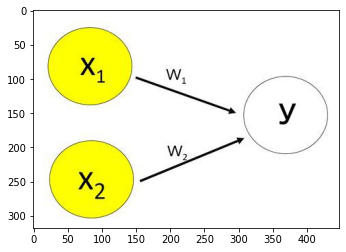

In [36]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('2perceptron.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

上の図には、2つの信号を入力として受け取るパーセプトロンの例を示している。

$x_1$、$x_2$は入力信号、yは出力信号、$w_1$、$w_2$は重み(ウエイト)を表す。

図の〇は「ニューロン」や「ノード」と呼ばれる。

入力信号は、ニューロンに送られる際に、それぞれに固有の重みが乗算される($w_1 x_1$、$w_2 x_2$)。

ニューロンでは、送られてきた信号の総和が計算され、その総和がある限界値を超えた場合にのみ1を出力する。

これを、「ニューロンが発火する」と表現することもある。

ここでは、その限界値を**閾値**と呼び、$\theta$という記号で表すことにする。

　

パーセプトロンの動作原理は、これだけである。

以上のことを数式で表すと、以下になる。

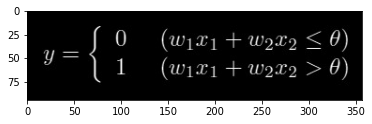

In [37]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('shiki.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

パーセプトロンは、複数ある入力信号のそれぞれに固有の重みをもつ。

そして、その重みは、各信号の重要性をコントロールする要素として働く。

つまり、重みが大きければ大きいほど、その重みに対応する信号の重要性が高くなる。

重みは、電流でいうところの「抵抗」に相当する。

抵抗は電流の流れにくさを決めるパラメータであり、抵抗が低ければ低いほど大きな電流が流れる。

一方、パーセプトロンの重みは、その値が大きければ大きいほど、大きな信号が流れることを意味する。

抵抗も重みも、信号の流れにくさ(流れやすさ)をコントロールするという点においては同じ働きをする。

# 2 単純な論理回路

**2.1ANDゲート**

それでは、パーセプトロンを使って簡単な問題を考えてみることにする。

ここでは、論理回路を題材とし、最初にANDゲートについて考えていく。

ANDゲートとは、2入力1出力のゲートである。

下図のような入力信号と出力信号の対応表を「真理値表」と呼ぶが、ANDゲートは、図に示すように、2つの入力が1のときだけ1を出力し、それ以外は0を出力する。

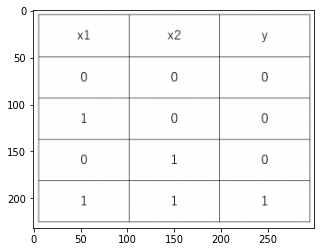

In [38]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('andgate.png') # 画像の読み込み
plt.imshow(img)

plt.show()

このANDゲートをパーセプトロンで表現する。

ここで行う作業は、真理値表を満たすように、$w_1$、$w_2$、$\theta$を決めることである。

それでは、どのような値に設定すれば、図の条件を満たすパーセプトロンを作ることができるだろうか。

実は、その値は無限にある。

例えば、例えば、$(w_1,w_2,\theta)=(0.5,0.5,0.7)$のときに、図のように動作する。

また、$(0.5,0.5,0.8)$や$(1.0,1.0,1.0)$のときも同様にANDゲートの条件を満たす。

そのようなパラメータを設定すれば、$x_1$と$x_2$の両方が1のときだけ、重み付き信号の総和が、与えられた閾値$\theta$を上回る。

**2.2 NANDゲートとORゲート**

続いて、NANDゲートを考える。

NANDとは、Not ANDを意味し、その振る舞いは、ANDゲートの出力を逆にしたものになる。

真理値表で表すと、以下に示す図のように、$x_1$と$x_2$の両方が1のときだけ0を出力し、それ以外は1を出力する。

それでは、NANDゲートのパラメータは、どのような組み合わせが考えられるだろうか。

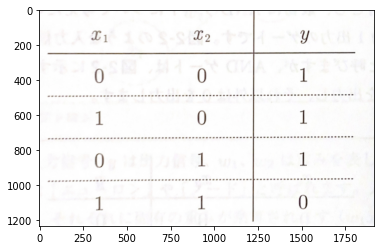

In [39]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('nand.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

NANDゲートを表現するには、例えば、$(w_1,w_2,\theta)=(-0.5,-0.5,-0.7)$の組み合わせが考えられる(他の組み合わせも無限大にある)。

実は、ANDゲートを実現するパラメータの値に対して、それらの符号をすべて反転させるだけで、NANDゲートを実現することもできる。

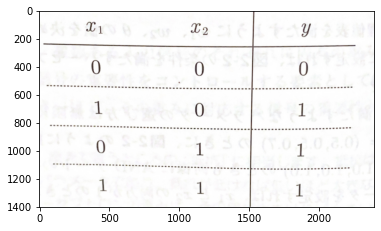

In [40]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('or.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

同じ流れで、ORゲートについて考える。

ORゲートは、入力信号の少なくともひとつが1であれば、出力が1になる論理回路である。

このORゲートは、どのようなパラメータを設定すべきか、、、
今考えてみましょう。

ここでパーセプトロンのパラメータを決めているのは、コンピュータではなく、我々人間である。

真理値表という「学習データ」を見ながら、人の手によってパラメータの値を考えた。

機械学習の問題では、このパラメータの値を決める作業をコンピュータに自動で行わせる。

**学習**とは、適切なパラメータを決める作業であり、人が行う仕事は、パーセプトロンの構造(モデル)を考え、コンピュータに学習データを与えることになる。

以上のように、パーセプトロンを使えば、AND、NAND、ORという論理回路を表現できることが分かった。

ここで重要な点は、パーセプトロンの構造は、AND、NAND、ORゲートのすべてで同じであるということである。

実際、その3つのゲートで異なるものは、パラメータ(重みと閾値)だけであった。

つまり、同じ構造のパーセプトロンが、パラメータの値を適切に調整するだけで、カメレオン俳優が様々な人物を演じるように、ANDやNANDやORに変身したのである。

# 3 パーセプトロンの実装

**3.1 簡単な実装**

それでは、先の論理回路をPythonで実装しよう。

ここでは、引数として$x_1$と$x_2$を受け取る**AND**という関数を定義する。

In [41]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

パラメータの**w1,w2,theta**は関数内で初期化し、重み付き入力の総和が閾値を超えると1を返し、それ以外は0を返す。

それでは、出力してみよう。

In [42]:
AND (0, 0) # 0を出力
AND (1, 0) # 0を出力
AND (0, 1) # 0を出力
AND (1, 1) # 1を出力

1

期待した通りの出力になっている。

これで、ANDゲートが実現できた。

同様の手順で、NANDゲートやORゲートも実装できる。

だが、ここで少し手を加える。

**3.2 重みとバイアスの導入**

先のANDゲートの実装は素直でわかりやすかったが、これ以降のことを考えて、別の実装方式へと修正していく。

それに先立ち、パーセプトロンの数式の$\theta$を$-b$として、パーセプトロンの動作を次の式で表す。

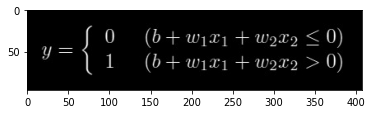

In [43]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('shiki2.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

この式は、記号の表記を変えただけで、全く同じことを表している。

ここで、$b$を**バイアス**と呼び、$w_1$や$w_2$を**重み**と呼ぶ。

この式が表すように、パーセプトロンでは、入力信号に重みが乗算された値とバイアスの和が計算され、その値が$0$を上回れば$1$を出力し、そうでなければ$0$を出力する。

それでは、NumPyを使って、上式の方式で実装してみよう。

In [44]:
import numpy as np
x = np.array([0, 1])     # 入力
w = np.array([0.5, 0.5]) # 重み
b = -0.7                 #バイアス
w*x

array([0. , 0.5])

In [45]:
np.sum(w*x)

0.5

In [46]:
np.sum(w*x) + b

-0.19999999999999996

この例で示すように、NumPy配列の乗算では、2つの配列の要素数が同じ場合、その要素どうしが乗算される。

そのため、**w*x**の計算では、各要素の乗算が計算されることになる。

(**[0, 1] * [0.5, 0.5] => [0, 0.5]**

また、**np.sum(w*x)**では各要素の総和が計算される。

この重み付き和にバイアスを加算すれば、上式の計算は終了となる。

**3.3 重みとバイアスによる実装**

「重みとバイアスによる方式」を用いれば、ANDゲートは次のように実装することができる。

In [47]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <=0:
        return 0
    else:
        return 1

ここで$-\theta$をバイアス$b$と命名したが、バイアスは、重みの$w_1$や$w_2$とは別の働きをすることに注意しよう。

具体的に言うと、$w_1$や$w_2$は入力信号への重要度をコントロールするパラメータとして機能するが、バイアスは発火のしやすさ---出力信号が1を出力する度合い---を調整するパラメータとして機能する。

例えば、$b$が$-0.1$であれば、入力信号の重み付き和が0.1を上回るだけでニューロンが発火する。

しかし、もし$b$が$-20.0$であれば、入力信号の重み付き和が$20.0$を上回らなければニューロンは発火しない。

このように、バイアスの値によって、ニューロンの発火のしやすさが決まる。

なお、$w_1$や$w_2$は「重み」と呼び、$b$は「バイアス」として区別して呼ぶが、文脈によっては$b,w_1,w_2$のすべてのパラメータを指して「重み」と呼ぶこともある。

バイアスという用語には、「ゲタ履き」という意味がある。

これは、入力が何もないときに(入力が0のときに)、出力にどれだけゲタを履かせるか(値を上乗せするか)ということを意味する。

それでは、続いてNANDゲートとORゲートを実装する。

In [48]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # 重みとバイアスだけがANDと違う!
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <=0:
        return 0
    else:
        return 1

In [49]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) # 重みとバイアスだけがANDと違う!
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

# 4 パーセプトロンの限界

これまで見てきたように、パーセプトロンを用いれば、AND、NAND、ORの3つの論理回路を実装することができた。

それでは続いてXORゲートについて考えてみたいと思う。

**4.1 XORゲート**

XOrゲートは**排他的論理和**とも呼ばれる論理回路である。

図に示すように、$x_1$と$x_2$のどちらかが1のときだけ出力が1となる。

(排他的とは、自分以外は拒否することを意味する。)

さて、このXORゲートをパーセプトロンで実装するには、どのような重みパラメータを設定すればよいだろうか。

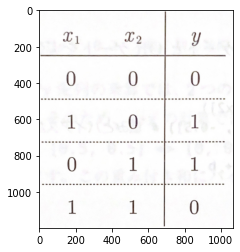

In [50]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('xor.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

実は、これまで見てきたパーセプトロンでは、このXORゲートを実現することができない。

なぜANDやORは実現できて、XORは実現できないのだろうか。

それを説明するために、ここでは図を用いて視覚的に考えてみたいと思う。

まず、ORゲートの挙動を視覚的に考えてみる。

ORゲートは、例えば重みパラメータが$(b, w1, w2)=(-0.5, 1.0, 1.0)$のとき、真理値表を満たす。

このとき、パーセプトロンは次の式で表現される。

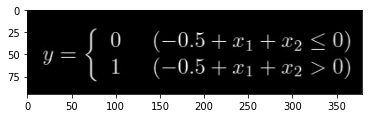

In [51]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('shiki3.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

この式で表されるパーセプトロンは、$-0.5 + x_1 + x_2 = 0$の直線で分断された2つの領域を作る。

直線で分けられた片方の領域は1を出力し、もう片方は0を出力する。

これを図で表すと、下図のようになる。

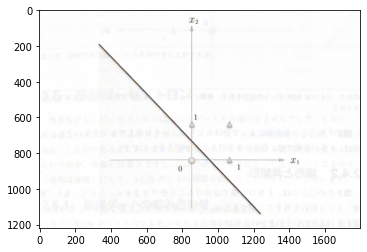

In [52]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('per.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

ORゲートは$(x_1,x_2)=(0,0)$のとき0を出力し、$(0,1)$、$(1,0)$、$(1,1)$のとき1を出力する。

図では、0を〇、1を△で表している。

ORゲートを作ろうと思えば、図の〇と△を直線によって分ける必要がある。

実際、先の直線は、4つの点を正しく分けることができている。

それでは、XORゲートの場合はどうだろうか。

ORゲートのときのように、1本の直線によって〇と△を分ける領域を作り出すことはできるだろうか。

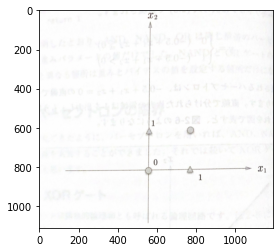

In [53]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('27.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

図の〇と△を直線によって分けることは、いくら考えてもできないのである!!!

実は、1本の「直線」では、〇と△を分けることができないのだ。

**4.2 線形と非線形**

上図の〇と△は、$1$本の直線では分けることができない。

しかし、もしも"直線"という制約を外すことができれば、〇と△を分けることができる。

たとえば、下図のように。

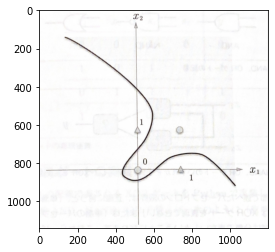

In [54]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('28.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

# 5 多層パーセプトロン

残念ながら、パーセプトロンはXORゲートを表現できなかった。

しかし、それは悲しいニュースではない。

実は、パーセプトロンの素晴らしさは、"層を重ねる"ことができる点にある。

(層を重ねることでXORを表現できるようになる、というのが、本節の筋書きである。)

ここでは、「層を重ねる」とはどういうことかという説明は後回しにして、XORゲートの問題を別の視点から考えたいと思う。

**5.1 既存ゲートの組み合わせ**

さて、XORゲートを作るにはいくつか方法がある。

ひとつの方法は、これまで作ってきたAND、NAND、ORゲートを組み合わせて配線することである。

ここでは、AND,NAND、ORゲートを下図の記号で表記する。

ちなみに、図のNANDゲートの先端にある〇は出力が反転することを意味する。

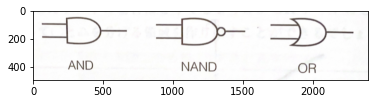

In [55]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('ano.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

それでは、XORゲートを作るには、ANDとNANDとORをどのように配線すればよいだろうか。



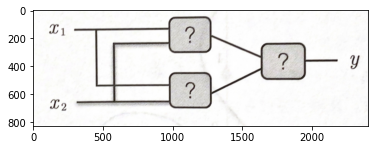

In [56]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('210.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

前節で述べたパーセプトロンの限界は、正確に言うと、「単層のパーセプトロンではXORゲートを表現できない」ということになる。

または、「単層のパーセプトロンでは非線形領域は分離できない」ということである。

これから、パーセプトロンを組み合わせることで(層を重ねることで)、XORゲートを実現できることを見ていく。

XORゲートは、下図で実現できる。

ここでは、$x_1$と$x_2$が入力信号、$y$が出力信号を表す。

$x_1$と$x_2$はNANDとORゲートへの入力であり、NANDとORの出力がANDゲートの入力になる。

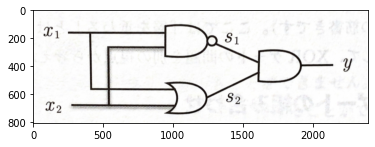

In [57]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('211.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

それでは、この図が本当にXORを実現できているのか確かめる。

ここではNANDの出力を$s_1$、ORの出力を$s_2$として、真理値表を埋めてみる。

結果は、下のようになる。

$x_1$、$x_2$、$y$に着目すると、確かにXORの出力になっている。

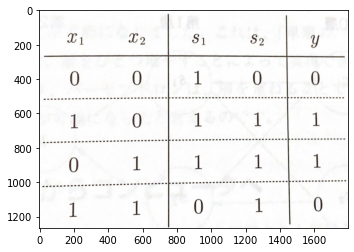

In [58]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('212.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

**5.2 XORゲートの実装**

続いてXORゲートをPythonで実装してみる。

これまで定義した関数AND、NAND、ORを使えば、次のように実装することができる。

In [59]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

この関数は、期待した通りの結果を出力する。

In [60]:
XOR(0, 0) # 0を出力

0

In [61]:
XOR(1, 0) # 1を出力

1

In [62]:
XOR(0, 1) # 1を出力

1

In [63]:
XOR(1, 1) # 0を出力

0

これで、XORゲートを完成させることができた。

それでは、今実装したXORを、パーセプトロンの表現で(ニューロンを明示的に示して)表してみる。

すると、下図のようになる。

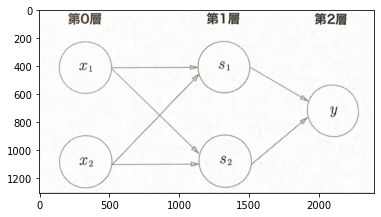

In [64]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('213.jpg') # 画像の読み込み
plt.imshow(img)

plt.show()

XORは、図に示すような多層構造のネットワークである。

ここでは、一番左の段を第0層、その右の段を第1層、一番右の段を第2層と呼ぶことにする。

さて、図のパーセプトロンは、これまで見てきたANDやORのパーセプトロンとは異なる形をしている。

実際、ANDやORが単層のパーセプトロンであったのに対して、XORは2層のパーセプトロンである。

ちなみに、層を複数重ねたパーセプトロンを**多層パーセプトロン**(multi-layered perception)と言うこともある。

え？図のパーセプトロンは3層じゃないかって？

重みをもつ層は実質2層(第0層と第1層の間、第1層と第2層の間)であるから、「2層のパーセプトロン」なのである。

2層のパーセプトロンでは、第0層と第1層のニューロンの間で信号の送受信が行われ、続いて第1層と第2層の間で信号の送受信が行われる。

この動作をより詳しく述べると、次のようになる。



1.   第0層の2つのニューロンが入力信号を受け取り、第1層のニューロンへ信号を送る。
2.   第1層のニューロンが第2層のニューロンへ信号を送り、第2層目のニューロンは$y$を出力する。



ちなみに、この2層構造のパーセプトロンの動作は、パイプラインによる組み立て作業にたとえることができる。

1段目(1層目)の作業者は流れてくる"部品"に手を加え、仕事が完了したら2段目(2層目)の作業者に部品を渡す。

2層目の作業者は、1層目の作業者から渡された"部品"に手を加え、その部品を完成させて出荷(出力)する。

このように、XORゲートのパーセプトロンでは、作業者の間で"部品の手渡し"が行われる。

そのような構造(2層構造)にすることで、パーセプトロンはXORゲートを実現することが可能になった。

これは、「単層のパーセプトロンでは表現できなかったことが、層を一つ増やすことによって実現できるようになった」と解釈できる。


つまり、パーセプトロンは、層を重ねることで(層を深くすることで)、より柔軟な表現が可能になったと言える。

# 6 NANDからコンピュータへ

多層のパーセプトロンは、これまで見てきた回路よりも複雑な回路を作ることができる。

例えば、足し算を行うための加算器もパーセプトロンで作ることができる。

また、2進数を10進数に変換するエンコーダや、ある条件を満たすときに出力が1となるような回路(パリティチェック用の回路)も、パーセプトロンで表現できる。

そして、実のところ、パーセプトロンを用いれば、"コンピュータ"も表現することができる。

ところで、コンピュータとは、情報を処理する機械である。

コンピュータに何らかの入力を与えれば、ある決まった方法で処理して結果を出力する。

ある決まった方法で処理をするということは、コンピュータもパーセプトロンと同じように入力と出力を持ち、ある決まったルールに従って計算をするということになる。

コンピュータの内部ではとても複雑な処理を行っているように思えるが、実はNANDゲートの組み合わせだけで、コンピュータが行う処理を再現できるのである。

NANDゲートだけからコンピュータを作れるという驚くべき事実は何を表しているのか--------------------------それは、パーセプトロンでもコンピュータを表現できるということだ！

なぜなら、これまで見てきたように、NANDゲートはパーセプトロンで作ることができたからである。

つまり、NANDゲートの組み合わせでコンピュータを作ることができるのならば、パーセプトロンの組み合わせだけからでもコンピュータを表現することが可能であるということになる。(パーセプトロンの組み合わせは幾層にも重なった単一のパーセプトロンとして表現できる。)

このように、多層のパーセプトロンはコンピュータも作れるほどに複雑な表現も可能である。

それでは、どのような構造のパーセプトロンであれば、コンピュータを表現できるのだろうか。

どれだけ層を深くすると、コンピュータを作れるのだろうか。

この問いに関する答えは、理論上2層のパーセプトロンであればコンピュータを作ることができる、と言える。

というのも、2層のパーセプトロン(正確には活性化関数に非線形なシグモイド関数を用いたもの：詳細はdeepzero3.ipynb)を用いれば、任意の関数を証明可能であることが証明されている。

しかし、2層のパーセプトロンの構造で、適切な重みを設定してコンピュータを作るとなると、それはとても骨の折れる作業となるだろう。

実際に、NANDなどの低レベルな素子からスタートしてコンピュータを作る場合は、必要な部品(モジュール)を段階的に作り上げていくというのが自然な作り方である。

最初にANDやORゲート、次に半加算器と全加算器、次に算術論理演算装置(ALU)、次にCPUといった具合に。

そのため、パーセプトロンによるコンピュータの表現も、層が幾重にも重なった構造として作られるのが自然な流れである。

# 7 まとめ

本ノートでは、パーセプトロンについて学んだ。

パーセプトロンはとてもシンプルなアルゴリズムなので、その仕組みは割とすぐに理解できたと思う。

パーセプトロンはニューラルネットワークの基礎である。

つまり、とても重要な概念である。